In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Top100_final.csv')

data = data.drop(columns=['N_name', 'Name'])

# 分離特徵和目標
X = data.drop(columns='Top 100')
y = data['Top 100']

### 測試不同的kernel函數對分類模型效能的影響

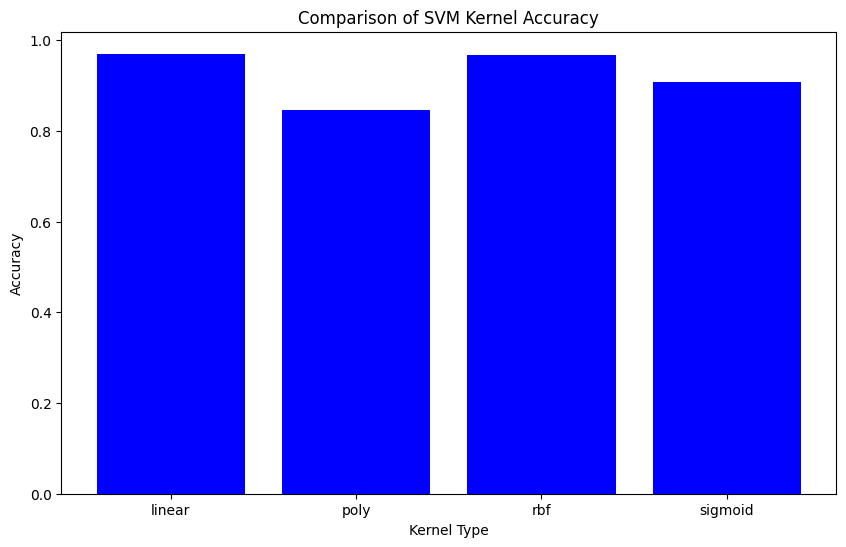

In [51]:
# 定義不同的核函數
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

# 訓練不同核函數的 SVM 模型並計算準確率
for kernel in kernels:
    svm_classifier = SVC(kernel=kernel)
    svm_classifier.fit(X_train_scaled, y_train)
    y_pred = svm_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# 繪製準確率比較圖
plt.figure(figsize=(10, 6))
plt.bar(kernels, accuracies, color='blue')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('Comparison of SVM Kernel Accuracy')
plt.show()

### 測試在linear模型之中不同的C值哪一個的表現最佳

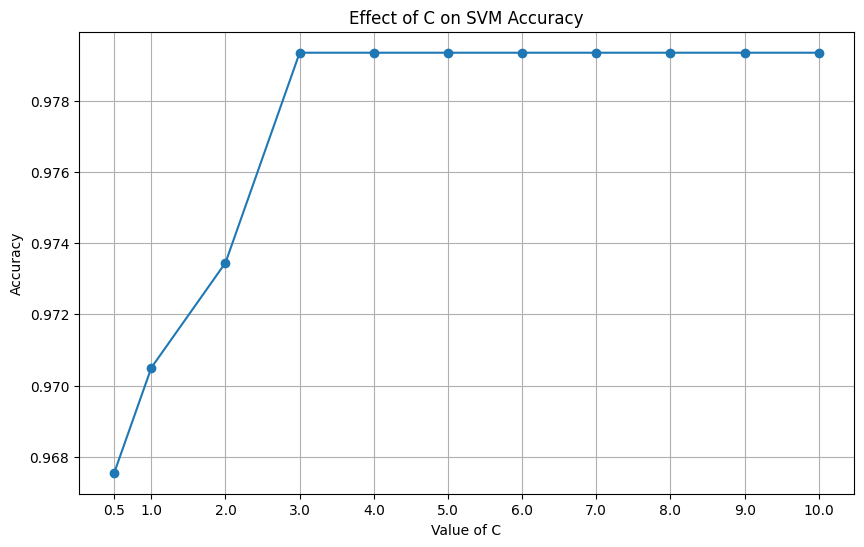

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C_values = [0.5,1,2,3,4,5,6,7,8,9,10]
accuracies = []

for C in C_values:
    svm_classifier = SVC(kernel='linear', C=C)
    svm_classifier.fit(X_train_scaled, y_train)
    y_pred = svm_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracies, marker='o')
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.title('Effect of C on SVM Accuracy')
plt.grid(True)
plt.xticks(C_values)  # 確保每個 C 值都有一個刻度
plt.show()

### 測試在rbf模型之中不同的C值哪一個的表現最佳

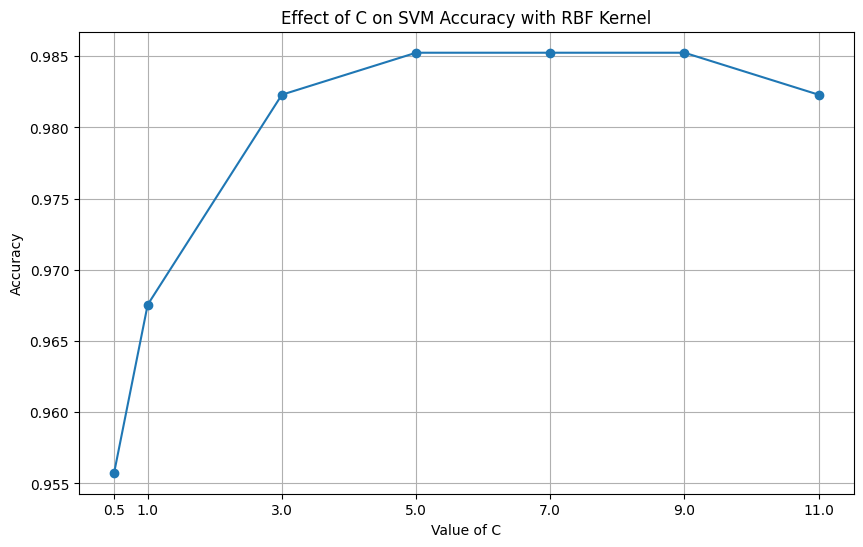

In [65]:
C_values = [0.5, 1, 3, 5, 7, 9, 11]
accuracies = []

for C in C_values:
    svm_classifier = SVC(kernel='rbf', C=C, gamma='scale')
    svm_classifier.fit(X_train_scaled, y_train)
    y_pred = svm_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracies, marker='o')
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.title('Effect of C on SVM Accuracy with RBF Kernel')
plt.grid(True)
plt.xticks(C_values)
plt.show()

### 根據剛剛得到的洽當C值，現在找尋不同的gamma對模型的影響

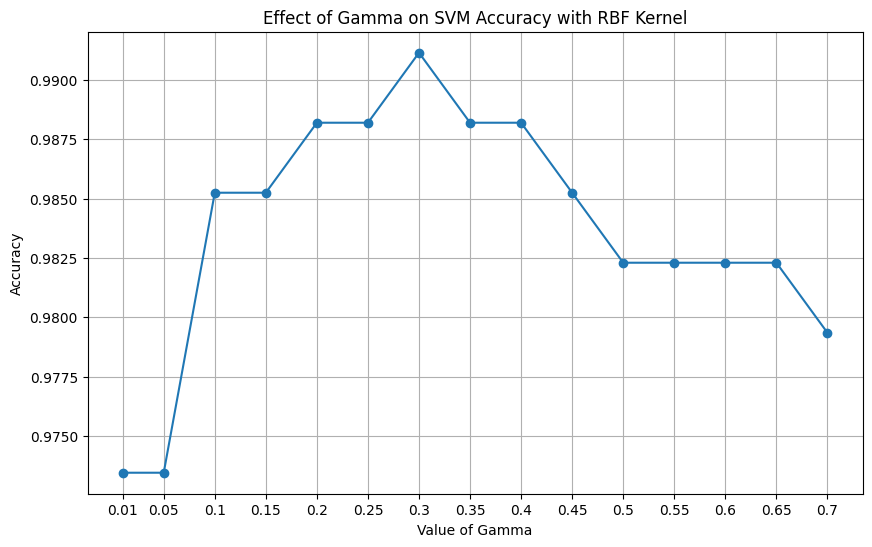

In [66]:
C_fixed = 7

gamma_values = [0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7]
accuracies = []

for gamma in gamma_values:
    svm_classifier = SVC(kernel='rbf', C=C_fixed, gamma=gamma)
    svm_classifier.fit(X_train_scaled, y_train)
    y_pred = svm_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(gamma_values, accuracies, marker='o')
plt.xlabel('Value of Gamma')
plt.ylabel('Accuracy')
plt.title('Effect of Gamma on SVM Accuracy with RBF Kernel')
plt.grid(True)
plt.xticks(gamma_values, labels=[str(g) for g in gamma_values])  # 確保每個 gamma 值都有一個刻度
plt.show()

### 利用cross validation搭配不同的split值測試linear SVM的穩定度

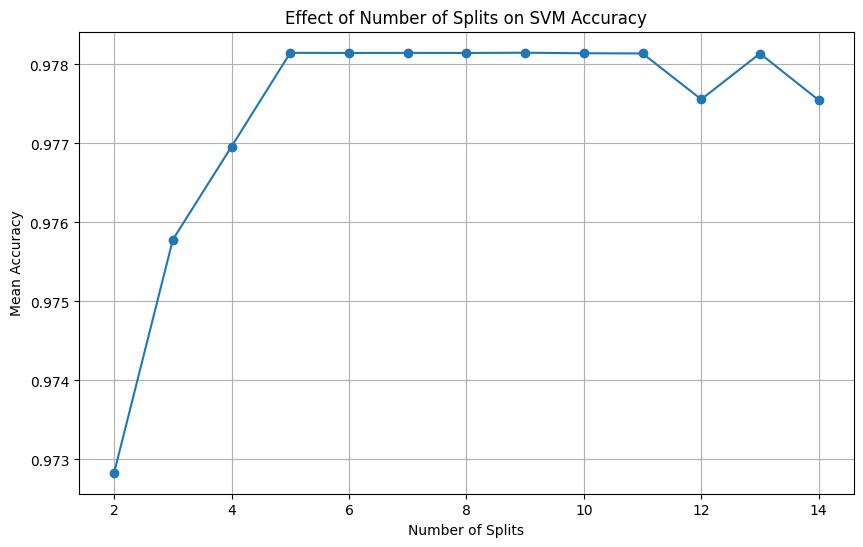

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm_classifier = SVC(kernel='linear', C=10)

split_range = range(2, 15)
mean_accuracies = []

for n_splits in split_range:
    cv = StratifiedKFold(n_splits=n_splits)
    accuracy_scores = cross_val_score(svm_classifier, X_scaled, y, cv=cv, scoring='accuracy')
    mean_accuracies.append(np.mean(accuracy_scores))

plt.figure(figsize=(10, 6))
plt.plot(split_range, mean_accuracies, marker='o')
plt.xlabel('Number of Splits')
plt.ylabel('Mean Accuracy')
plt.title('Effect of Number of Splits on SVM Accuracy')
plt.grid(True)
plt.show()

### 利用cross validation搭配不同的split值測試rbf SVM的穩定度

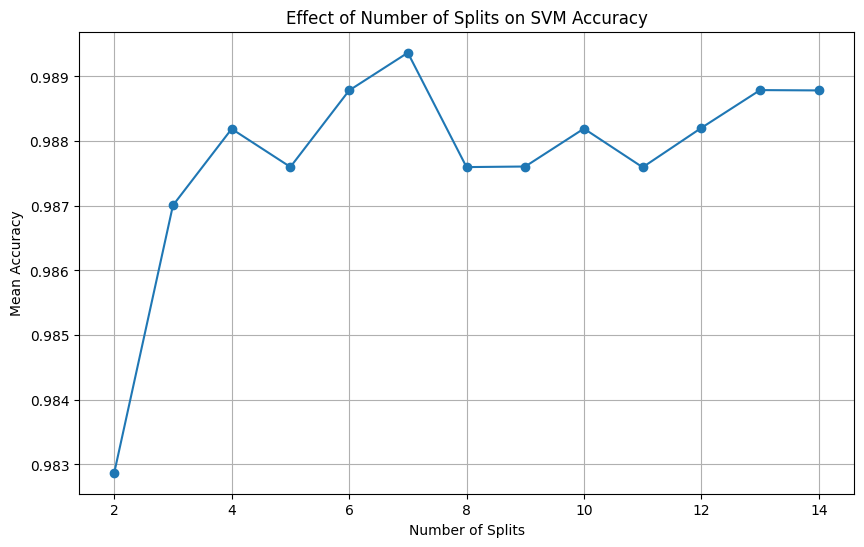

In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm_classifier = SVC(kernel='rbf', C=7, gamma=0.3)

split_range = range(2, 15)
mean_accuracies = []

for n_splits in split_range:
    cv = StratifiedKFold(n_splits=n_splits)
    accuracy_scores = cross_val_score(svm_classifier, X_scaled, y, cv=cv, scoring='accuracy')
    mean_accuracies.append(np.mean(accuracy_scores))

plt.figure(figsize=(10, 6))
plt.plot(split_range, mean_accuracies, marker='o')
plt.xlabel('Number of Splits')
plt.ylabel('Mean Accuracy')
plt.title('Effect of Number of Splits on SVM Accuracy')
plt.grid(True)
plt.show()

### 最後選出的最佳參數設置

根據一開始的測試，可以知道在不同kernel函數的模型中，使用linear以及rbf可以使SVM的表現較好，因此接著開始測試不同的C值的影響，同時rbf多了一個gamma參數要調整。
在兩者測試找恰當的C值後，rbf模型仍需要gamma的測試，因此也在選到恰當的C值之後，便使用該C值作為固定變數並使用for迴圈來看看最佳的gamma值為多少，在這個階段可以得知linear以及rbf兩者的表現都有大約98%的準確度，而rbf模型更優一點點，因此最後則是要使用cross validation來測試模型的穩定性。
在使用cross validation之後，可以發現linear以及rbf兩種模型在表現上都足夠穩定，不會出現看起來像overfitting的狀況，因此最後便使用了在測試之中表現最佳的rbf模型，搭配C值等於7以及gamma值等於0.3作為參數，而在cross validation中可以發現基本上大部分的split選擇都不太會影響到模型本身的效能，因此最後就使用了在測試之中表現最好的7等分作為最終版本，並大約使用0.15作為1/7的近似值，最終得到了98%的準確度。

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_classifier = SVC(kernel='rbf', C=7, gamma=0.3)

svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[129   3]
 [  1 121]]
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       132
         1.0       0.98      0.99      0.98       122

    accuracy                           0.98       254
   macro avg       0.98      0.98      0.98       254
weighted avg       0.98      0.98      0.98       254

